In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from variables import *

# DATA EXPLORATION

In [2]:
pathr = PATH_ML
df = pd.read_csv(pathr)
df.head()

,folio,NumPersHog,NoED,EDBasic,EDMedia,EDLic,EDPost,EDNoesp,NoTienViv,VivPagada,...,Divorci,Viudo,Casado,Soltero,NoSabe,numDormi,numRoom,numbano,mtcuad,rentaviv
0,1,2,0,1,0,0,0,0,0,0,...,0,0,1,0,0,2,5,1,233,0
1,2,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,4,6,2,175,0
2,3,3,0,0,0,1,0,0,0,0,...,0,0,0,1,0,3,5,3,233,0
3,4,3,1,0,0,0,0,0,0,0,...,0,1,0,0,0,3,6,2,157,0
4,5,6,0,1,0,0,0,0,0,1,...,0,1,0,0,0,5,6,1,66,0


In [3]:
# We check for the variable types of the columns, we see that all are numeric
df.dtypes

folio         int64
NumPersHog    int64
NoED          int64
EDBasic       int64
EDMedia       int64
              ...  
numDormi      int64
numRoom       int64
numbano       int64
mtcuad        int64
rentaviv      int64
Length: 63, dtype: object

In [4]:
df.set_index('folio', inplace=True)


In [5]:
# Create a new column 'EducationLevel' based on the given conditions
df['EducationLevel'] = np.select(
    [
        df['EDPost'] == 1,
        df['EDLic'] == 1,
        df['EDMedia'] == 1,
        df['EDNoesp'] == 1,
        df['EDBasic'] == 1,
        df['NoED'] == 1
    ],
    [5, 4, 3, 2, 1, 0],
    default=np.nan  
)

# Drop the original education columns if needed
df = df.drop(['EDPost', 'EDLic', 'EDMedia', 'EDBasic', 'EDNoesp', 'NoED'], axis=1)
# Convert the 'EducationLevel' column to a categorical type
# df['EducationLevel'] = df['EducationLevel'].astype('category')


In [6]:
df.head(7)

,NumPersHog,NoTienViv,VivPagada,VivPagan,VivRent,VivOther,NoOcup,Empleado,Jornalero,Patron,...,Viudo,Casado,Soltero,NoSabe,numDormi,numRoom,numbano,mtcuad,rentaviv,EducationLevel
folio,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,1,0,0,0,0,1,0,...,0,1,0,0,2,5,1,233,0,1.0
2,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,4,6,2,175,0,3.0
3,3,0,0,0,0,1,0,0,0,0,...,0,0,1,0,3,5,3,233,0,4.0
4,3,0,0,1,0,0,0,0,1,0,...,1,0,0,0,3,6,2,157,0,0.0
5,6,0,1,0,0,0,0,1,0,0,...,1,0,0,0,5,6,1,66,0,1.0
6,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,4,5,1,59,0,1.0
7,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,4,7,2,233,0,1.0


In [7]:
df['Employee'] = np.select(
    [
        df['Empleado'] == 1,
        df['FamWorker'] == 1,
        df['Jornalero'] == 1,
        df['NoOcup'] == 1,
        df['Patron'] ==1,
    ],
    [1, 1, 1, 0, 1],
    default = 0  # You can adjust the default value based on your preference
)

df = df.drop(['Empleado', 'FamWorker', 'Jornalero','NoOcup'], axis=1)
    


In [8]:
 df.head()

,NumPersHog,NoTienViv,VivPagada,VivPagan,VivRent,VivOther,Patron,Emprend,MontCuentNomi,MontCuentAhorro,...,Casado,Soltero,NoSabe,numDormi,numRoom,numbano,mtcuad,rentaviv,EducationLevel,Employee
folio,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,1,0,0,0,0,0,0,...,1,0,0,2,5,1,233,0,1.0,1
2,1,0,1,0,0,0,0,0,0,0,...,0,1,0,4,6,2,175,0,3.0,1
3,3,0,0,0,0,1,0,1,0,5000,...,0,1,0,3,5,3,233,0,4.0,0
4,3,0,0,1,0,0,0,0,0,0,...,0,0,0,3,6,2,157,0,0.0,1
5,6,0,1,0,0,0,0,0,300,0,...,0,0,0,5,6,1,66,0,1.0,1


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20745 entries, 1 to 17386
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NumPersHog              20745 non-null  int64  
 1   NoTienViv               20745 non-null  int64  
 2   VivPagada               20745 non-null  int64  
 3   VivPagan                20745 non-null  int64  
 4   VivRent                 20745 non-null  int64  
 5   VivOther                20745 non-null  int64  
 6   Patron                  20745 non-null  int64  
 7   Emprend                 20745 non-null  int64  
 8   MontCuentNomi           20745 non-null  int64  
 9   MontCuentAhorro         20745 non-null  int64  
 10  TienActivFin            20745 non-null  int64  
 11  MontCuentGob            20745 non-null  int64  
 12  MontCuentInv            20745 non-null  int64  
 13  MontCuentAfore          20745 non-null  int64  
 14  MontCuentAhorroInf      20745 non-null  int

# DATA EXPLANATION

## DEMOGRAPHIC DATA
 * Hombre (Boolean for sex)
 * Mujer  (Boolean for sex)
 * Edad (age)
 * Civil status (boolean columns - 1 yes, 0 no):
     - UnionL (Non Married union)
     - Separado (Separated) 
     - Divorci (Divorced)
     - Viudo (Widowed)
     - Casado (Married) 
     - Soltero (Single) 
     - NoSabe (Doesn't know)
     
* Education level (int columns):
     - NoED (No education) - 0
     - EDBasic (Basic Education) - 1
     - EDNoesp (No especified) - 2
     - EDMedia (Intermediate Education) - 3
     - EDLic (Bachelor's level) - 4
     - EDPost (Post graduate level) - 5


* Ocupation (boolean columns):
    - NoOcup (No ocupation)
    - Empleado (Employed) 
    - Jornalero (Worker) 
    - Patron (Employer)
    - Emprend (Entrepeneur)
    - FamWorke (Family Worker)
    
 
 
 

## HOUSEHOLD DATA
* NumPersHog (# of people in the household)
* numDormi (# of sleep rooms)
* numRoom (# of rooms)
* numBano (# of bathrooms)
* mtcuad (Household's Square meters )
* rentaviv (How much pay for rent)
* Household status (boolean columns):
    - NoTienViv (Does not have household)
    - VivPagada (Household payed) 
    - VivPagan (Household in payments)
    - VivRent (Household rented) 
    - VivOther (Other catagory)


## ECONOMIC DATA
* numauto (# of owned vehicles) 
* nummotos (# of owned motocycles)
* numproperty (# of owned properties) 
* businessowner (# of owned businesses) 
* numdepatar (# of owned departmental credit cards)
* numcredtar (# of owned credit cards)

## FINANCIAL DATA
* Amount in financial accounts 
     - MontCuentNomi (Amount in nominal account) 
     - MontCuentAhorro (Amount in Saving account)
     - MontCuentGob (Amount in goverment support account)
     - MontCuentInv (Amount in Investments portfolio) 
     - MontCuentAfore (Amount in Retirement account) 
     - MontCuentAhorroI1nf (Amount in informal savings)  
     
* TienActivFin (Has Financial Assets - Boolean)
* TienActivNoFin (Has NonFinancial Assets - Boolean)
* (boolean):                      
* ValVentActivNoFin (Selling value of NonFinancial Assets) 
* ValVentViv (Selling value of Household)
* ValVentBienProd (Selling value of Productive Goods) 
* ValVentVehic (Selling value of Vehicle) 
* IngresoTotal (Total Income) 
* RiquezaNeta (Net Weatlh)

* Amount in debt credit
    - MontDeudCredViv (Amount in Credit Card Debt) 
    - MontDeudCredNoHip (Amount in NonHipotecary debt )
    - MontDeudCredBanc_Depar (Amount in Credit Departamental Card Debt) 
    - MontDeudCredNom (Amount in Nominal Credit Debt) 
    - MontDeudCredAutos (Amount in Car Financing Debt)  
    - MontDeudOtrCred (Amount in other types of debt) 

* inversiones (Has financial investments - boolean)
* NoAdeudos (Has debts - boolean) 
* RazDeudVivi (Housing debt ratio)

In [10]:
df['NoAdeudos'].head(15)

folio
1     1
2     0
3     1
4     0
5     1
6     1
7     1
8     1
9     0
10    0
11    1
12    0
13    0
14    0
15    0
Name: NoAdeudos, dtype: int64

# DATA SELECTION

# Mututal information after a cluster using all the existing variables
With this method I am planning on selecting the variables that represent the most the existing groups

In [11]:
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [107]:
# Assuming your original dataset is stored in the variable 'X'
X = df.values  # Assuming df is a pandas DataFrame

# Use KMeans for clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters based on your needs
clusters = kmeans.fit_predict(X)

# Check if there are at least two unique clusters
if len(set(clusters)) >= 2:
    # Calculate Mutual Information for each feature with respect to cluster assignments
    mutual_info_scores = [mutual_info_score(clusters, X[:, i]) for i in range(X.shape[1])]

    # Print or visualize Mutual Information scores
    for feature, mi_score in zip(df.columns, mutual_info_scores):
        print(f" {feature} - {mi_score}")
else:
    print("Error: At least two unique clusters are required for Mutual Information calculation.")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 NumPersHog - 0.0005775801101432104
 NoTienViv - 0.00015522973439793624
 VivPagada - 0.00015188493406285682
 VivPagan - 7.181179773784135e-05
 VivRent - 1.9449652000386945e-05
 VivOther - 0.00010018350549282739
 Patron - 1.9449652000386945e-05
 Emprend - 0.00010018350549282739
 MontCuentNomi - 0.00041801400065293964
 MontCuentAhorro - 0.0018723124261480549
 TienActivFin - 0.00010920843250992692
 MontCuentGob - 4.451919273968405e-06
 MontCuentInv - 0.001569512414085062
 MontCuentAfore - 0.0020066947924216845
 MontCuentAhorroInf - 0.002260587525040466
 TienActivNoFin - 3.4270614878953074e-05
 ValVentActivNoFin - 0.005218192532081698
 ValVentViv - 0.0011781376594789128
 ValVentBienProd - 0.000943204710917665
 ValVentVehic - 0.0040049214274677225
 IngresoTotal - 0.0038549480667108933
 RiquezaNeta - 0.005218192532081533
 MontDeudCredViv - 0.00049301969606779
 MontDeudCredNoHip - 0.002209967456878298
 MontDeudCredBanc_Depar - 0.0019255580173188785
 MontDeudCredNom - 0.0003162443484815986
 Mo

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [108]:
# Pair features with their Mutual Information scores and sort by scores
feature_mi_pairs = sorted(zip(df.columns, mutual_info_scores), key=lambda x: x[1], reverse=True)

# Print or visualize sorted Mutual Information scores
for feature, mi_score in feature_mi_pairs:
    print(f"* {feature}: {mi_score}")
    


* ValVentActivNoFin: 0.005218192532081698
* RiquezaNeta: 0.005218192532081533
* ValVentVehic: 0.0040049214274677225
* IngresoTotal: 0.0038549480667108933
* MontCuentAhorroInf: 0.002260587525040466
* MontDeudCredNoHip: 0.002209967456878298
* MontCuentAfore: 0.0020066947924216845
* mtcuad: 0.001991485299207529
* MontDeudCredBanc_Depar: 0.0019255580173188785
* MontCuentAhorro: 0.0018723124261480549
* edad: 0.0015822336301753108
* MontCuentInv: 0.001569512414085062
* ValVentViv: 0.0011781376594789128
* ValVentBienProd: 0.000943204710917665
* EducationLevel: 0.0008704512968837727
* numDormi: 0.0007208981966239252
* MontDeudOtrCred: 0.0006610704449015284
* numRoom: 0.0006257639902084136
* numbano: 0.000625408980727241
* NumPersHog: 0.0005775801101432104
* MontDeudCredViv: 0.00049301969606779
* numautos: 0.0004408024352664094
* MontCuentNomi: 0.00041801400065293964
* numdepatar: 0.0004168300225156902
* numproperty: 0.0003595169277946964
* MontDeudCredNom: 0.0003162443484815986
* numcredtar: 0

## Variance calculation for each variable

In [35]:
# Calculate the variance of each feature
variances = df.var()

# Get the top 5 variables with the largest variance
top_5_variances = variances.nlargest(10)

# Print or visualize the top 5 variances
print("Top 5 Variances:")
print(top_5_variances)

Top 5 Variances:
RiquezaNeta          1.012377e+14
ValVentActivNoFin    9.950840e+13
ValVentBienProd      4.398522e+13
ValVentVehic         7.244757e+12
MontCuentAfore       1.561474e+12
ValVentViv           7.606597e+11
IngresoTotal         6.852572e+10
MontCuentInv         4.572146e+10
MontDeudCredViv      2.202712e+10
MontDeudCredNoHip    5.501013e+09
dtype: float64


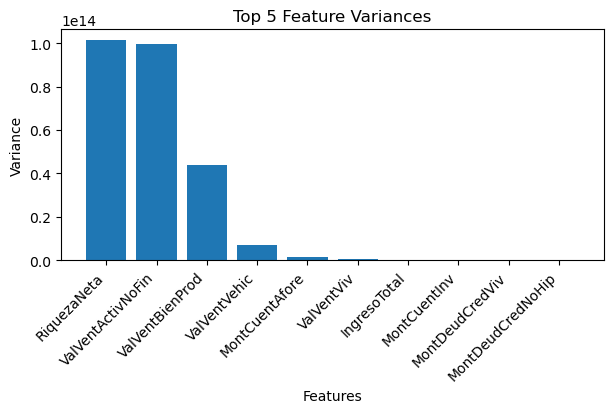

In [36]:
plt.figure(figsize=(7, 3))
plt.bar(top_5_variances.index, top_5_variances.values)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Top 5 Feature Variances')
plt.xticks(rotation=45, ha='right')
plt.show()

# CORRELATION

In [20]:
X = df

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Set the threshold for correlation
threshold = 0.55 # Adjust based on your needs

# Find and remove redundant features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]

            # Keep only one feature from each highly correlated group
            # Choose the one with higher importance or any other criterion
            if colname_i not in correlated_features:
                correlated_features.add(colname_i)

# Remove redundant features from the dataset
X_filtered = X.drop(columns=correlated_features)


In [21]:
# Create a new DataFrame with only the highly correlated features
X_filtered = X[list(correlated_features)]


In [22]:
correlated_features

{'Employee',
 'Emprend',
 'MontDeudOtrCred',
 'Mujer',
 'Patron',
 'RazDeudVivi',
 'RiquezaNeta',
 'TienActivNoFin',
 'ValVentBienProd',
 'numRoom'}

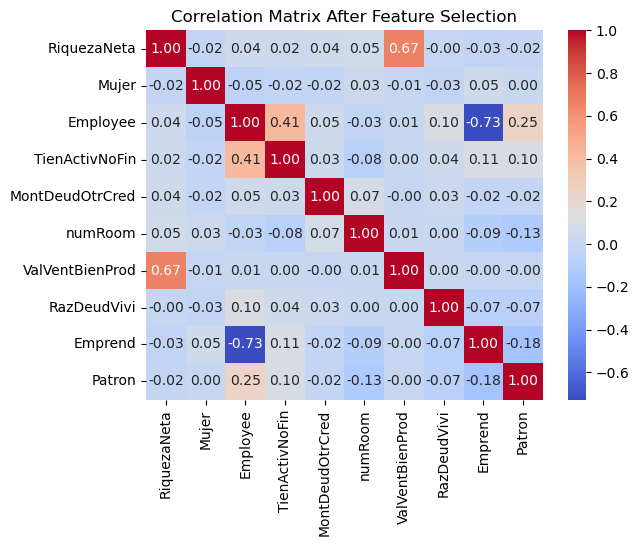

In [23]:
sns.heatmap(X_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix After Feature Selection')
plt.show()

# CLIENTS SEGMENTATION
 In this section we will use KKMeans to segment clients according to their financial and demographic characteristics to design better financial products for them according to their needs and posibiilities.
 


## Variables to use
- RiquezaNeta
- VivPagada
- VivOther

- Jornalero
- ValVentViv
- ValVentActivNoFin
- ValVentBienProd
- ValVentVehic



In [110]:
#= df[[,'numRoom',]]
mldf = df[['EducationLevel','edad','Employee','Emprend','IngresoTotal','ValVentVehic','ValVentActivNoFin', 'MontCuentAhorroInf','MontDeudCredBanc_Depar','MontCuentInv','MontDeudCredNoHip', 'MontDeudCredViv']].copy()
mldf.head()
# 

,EducationLevel,edad,Employee,Emprend,IngresoTotal,ValVentVehic,ValVentActivNoFin,MontCuentAhorroInf,MontDeudCredBanc_Depar,MontCuentInv,MontDeudCredNoHip,MontDeudCredViv
folio,,,,,,,,,,,,
1,1.0,62,1,0,125200,35000,1035000,4000,0,0,0,0
2,3.0,71,1,0,315300,150000,1385000,0,0,0,100000,0
3,4.0,65,0,1,318800,0,0,0,0,0,0,0
4,0.0,73,1,0,220800,0,30000,0,7600,0,19000,0
5,1.0,79,1,0,263360,0,1070000,2000,0,0,0,0


In [ ]:
# sample_data = [[4,23,1,0,1,10000,0,3,523,120800,1000]]
sample_data = [[4,23,1,
                0,1,10000,
                3,12000,10000,
                130800]]

In [111]:
X = mldf
# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Fit KMeans clustering
n_clusters = 4  # Adjust based on your needs
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(X_scaled)

# Calculate Mutual Information for each feature with respect to cluster assignments
mutual_info_scores = [mutual_info_score(clusters, X_scaled[:, i]) for i in range(X_scaled.shape[1])]



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warn

In [112]:
# Pair features with their Mutual Information scores and sort by scores
feature_mi_pairs = sorted(zip(mldf.columns, mutual_info_scores), key=lambda x: x[1], reverse=True)

# Print or visualize sorted Mutual Information scores
for feature, mi_score in feature_mi_pairs:
    print(f"*  {feature}, {mi_score}")

*  EducationLevel, 0.49835504625867155
*  Emprend, 0.4349510613586323
*  IngresoTotal, 0.3113287918203507
*  Employee, 0.263767812705317
*  ValVentActivNoFin, 0.26131780574736285
*  MontDeudCredNoHip, 0.13724990131787496
*  MontDeudCredBanc_Depar, 0.07885664538878423
*  ValVentVehic, 0.07653558743300007
*  edad, 0.04803268938294948
*  MontCuentAhorroInf, 0.03523802141348906
*  MontDeudCredViv, 0.03468048002425757
*  MontCuentInv, 0.010678133339832883


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## ELBOW METHOD

In [113]:
# Initialize a range of cluster numbers to test
cluster_range = range(2, 11)  # Adjust the range based on your needs

# Elbow Method: Calculate the sum of squared distances (inertia) for different cluster numbers
inertia = []
for n_clusters in cluster_range:
    print('range'+ str(n_clusters))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(mldf)
    inertia.append(kmeans.inertia_)


range2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


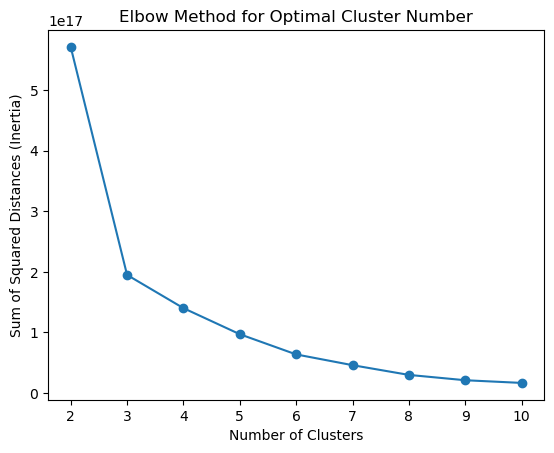

In [114]:
# Plot the Elbow Method curve
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


## SILHOUETTE SCORE

In [115]:
# Silhouette Score: Calculate the silhouette score for different cluster numbers
silhouette_scores = []
for n_clusters in cluster_range:
    print('range: '+ str(n_clusters))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(mldf)
    silhouette_scores.append(silhouette_score(mldf, clusters))


range: 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range: 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range: 4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range: 5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range: 6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range: 7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range: 8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range: 9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


range: 10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [116]:
silhouette_scores

[0.9985405812434199,
 0.994356595071836,
 0.9942162769672932,
 0.9514780291104605,
 0.9515151314898688,
 0.8662120068487905,
 0.882798204832596,
 0.7343508196887756,
 0.7271217629299416]

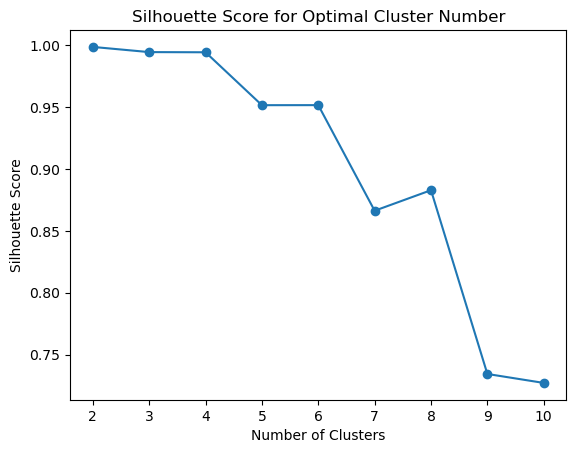

In [117]:
# Plot the Silhouette Score curve
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Creation of model

In [118]:
import joblib

# Assuming you have already trained the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(mldf)

# Save the model to a file
joblib.dump(kmeans, 'kmeans_model.joblib')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


['kmeans_model.joblib']

## Re-loading model and making a prediction

In [119]:
# Load the model from the file
loaded_kmeans = joblib.load('kmeans_model.joblib')

# Predict the cluster labels for the original dataset
cluster_labels = loaded_kmeans.predict(mldf)

# Create a new dataset with the original features and the cluster labels
clustered_data = pd.DataFrame(data=mldf, columns=mldf.columns)
clustered_data['Cluster_Labels'] = cluster_labels
clustered_data.head()

,EducationLevel,edad,Employee,Emprend,IngresoTotal,ValVentVehic,ValVentActivNoFin,MontCuentAhorroInf,MontDeudCredBanc_Depar,MontCuentInv,MontDeudCredNoHip,MontDeudCredViv,Cluster_Labels
folio,,,,,,,,,,,,,
1,1.0,62,1,0,125200,35000,1035000,4000,0,0,0,0,0
2,3.0,71,1,0,315300,150000,1385000,0,0,0,100000,0,0
3,4.0,65,0,1,318800,0,0,0,0,0,0,0,0
4,0.0,73,1,0,220800,0,30000,0,7600,0,19000,0,0
5,1.0,79,1,0,263360,0,1070000,2000,0,0,0,0,0


In [123]:
# Assuming 'clustered_data' contains your dataset with cluster labels
cluster_means = clustered_data.groupby('Cluster_Labels').mean()

# Display the mean values for each cluster
print(cluster_means)

                EducationLevel       edad  Employee  Emprend   IngresoTotal  \
Cluster_Labels                                                                
0                     2.086722  48.553755  0.737616  0.15907  169913.408479   
1                     2.500000  47.500000  1.000000  0.00000  372000.000000   
2                     4.571429  61.857143  0.428571  0.00000  342800.000000   
3                     3.333333  45.333333  1.000000  0.00000  395900.000000   

                ValVentVehic  ValVentActivNoFin  MontCuentAhorroInf  \
Cluster_Labels                                                        
0               4.271459e+04       7.022893e+05         4192.954517   
1               1.150000e+06       9.080000e+08            0.000000   
2               1.385714e+08       1.437867e+08        18800.000000   
3               1.700000e+05       2.273569e+08         9866.666667   

                MontDeudCredBanc_Depar  MontCuentInv  MontDeudCredNoHip  \
Cluster_Labels         

In [122]:
cluster_counts = clustered_data['Cluster_Labels'].value_counts()

# Display the count values for each cluster
print(cluster_counts)

Cluster_Labels
0    20733
2        7
3        3
1        2
Name: count, dtype: int64


Cluster 0:

Nivel educacional: Ninguno - Básico
Trabajadores asalariados: Menos del 70%
Gran parte son emprendedores
Activos financieros limitados en promedio
Ingreso promedio: $169,883
Deuda de crédito de vivienda promedio: $20,444
Cluster 1:

Nivel educacional: Básico - Medio
Mayoría son trabajadores asalariados
$908,000,000 en activos no financieros
Ingreso promedio: $372,000
Sin deuda hipotecaria en promedio
Cluster 2:

Nivel educacional: Licenciatura - Posgrado
Empleo: Trabajador asalariado menos del 50%
$124,612,800 en promedio de activos no financieros
Promedio de 6 dormitorios en el hogar
Deuda de crédito de vivienda promedio: $326,100.00

Cluster 3:

Nivel educacional: Medio - Licenciatura
No es en su mayoría emprendedor
$308,940,000 en activos no financieros
Ingreso promedio: $361,200
Deuda de crédito de vivienda promedio: $400,000

In [98]:
# Load the model from the file
loaded_kmeans = joblib.load('kmeans_model.joblib')

# Create a sample data array for prediction (replace with your actual data)
sample_data = [[4,41,1,0,1,119027000,4,266000,0,0,]]
# Predict the cluster labels for the sample data
predicted_clusters = loaded_kmeans.predict(sample_data)

# Display the predicted cluster labels
print("Predicted Cluster Labels:", predicted_clusters)

Predicted Cluster Labels: [2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Predicción de la capacidad de pago: 
El sistema debe poder predecir la capacidad de pago de un cliente

# Predeccion de capacidad de incumplimiento
usando arboles de decision o regresion logistica con:
"alto riesgo", "riesgo medio" y "bajo riesgo".